In [7]:
import numpy as np
from PIL import Image
from IPython.display import display


### Cost function 

$$ \frac{1}{2} \|W\|^{2} + C \sum_{i=1}^{n}max(0, 1 - y_{i} (W^{T}x_{i} + b)) $$

- $\frac{1}{2} \|W\|^{2}$ is the regularisation term
- The second terms  in the cost function is the hinge loss, which is the sum of the maximum of 0 and $1 - y_{i} (W^{T}x_{i} + b)$ for all training examples. This term penalizes misclassifications by measuring the distance of a point from the correct side of the decision boundary. 


- J(w,b) is the cost function.
- w is the weight vector.
- b is the bias term.
- C is the regularization parameter (controls the trade-off between margin maximization and
- classification error minimization).
- n is the number of training examples.
- $x_{i}$ is the feature vector of the i-th training example.
- $y_{i}$ is the class label of the i-th training example.

**Gradient descent** to find w and b that minimises the cost function

$w_{i} = w_{i} - \alpha \frac {\partial J w_{i}}{\partial w_{i}}$

$b = b - \alpha \frac {\partial J b}{\partial b}$


if $y_{i} (W^{T}x_{i} + b) >=1$: 

loss is zero, data is correctly classified, not weight update

$\frac{\partial J}{\partial w} = 0$

$\frac{\partial J}{\partial b} = 0$

$w = w$

$b = b$

if $y_{i} (W^{T}x_{i} + b) <1$: 

$\frac{\partial J w_{i}}{\partial w_{i}} = -C y_{i}x_{i} $

$\frac{\partial J b}{\partial b} = -C y_{i} $


##### Polynomial 
The polynomial kernel computes relationships between paris of observations. $X_{i}$ and $X_{j}$ refer to the two observations we want to calculated the high dimensional relationship. C determines the polynomials coefficient. D determines the degree of the polynomial. These can be determined using CV. 

$$k(X_{i}, X_{j}) = (X_{i}X_{j} + c)^d$$ where $d$ is the degree of polynomial
z

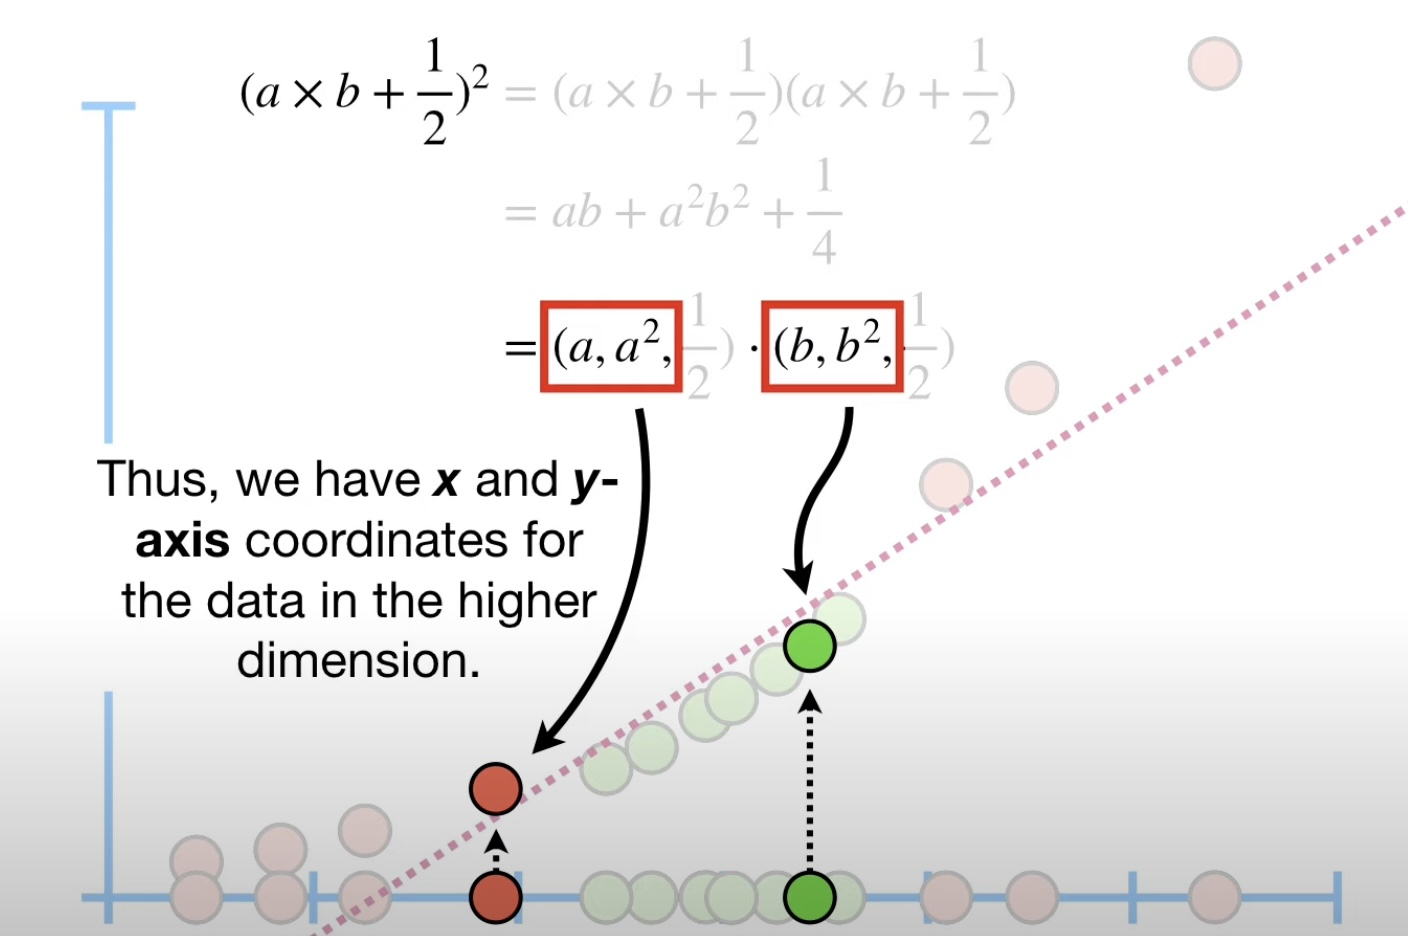

In [8]:
img = Image.open('../images/SVM_polynomial_example.jpg')
display(img)


##### Gaussian radical basis function

RBF SVM works by mapping the input data into a higher-dimensional feature space, where the classes can be separated by a hyperplane. The kernel function measures the similarity between pairs of data points based on their distance in the feature space.

$$k(X_{i}, X_{j}) = exp(- \frac{\|X_{i}-X_{j}\|^2} {2\sigma^{2}})$$

$$k(X_{i}, X_{j}) = exp(-\gamma\|X_{i}-X_{j}\|^2)$$

where: 

- $X_{i}$ and $X_{j}$ are input data points (i.e. vectors),
- $\sigma$ is a parameter that controls the width of the Gaussian distribution. It is inversely proportional to the $\sigma$: $\gamma = \frac{1}{2\sigma^{2}}$
- $||X_{i} - X_{j}||^2$ is the Euclidean distance between the feature vectors.
  



#### Taylor series 

The general form of the Taylor series for a function f(x) centered at a point a is given by: 

$$f(x) = f(a) + f'(a)(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \frac{f'''(a)}{3!}(x - a)^3 + \ldots$$

Mathematically, the n-th term in the Taylor series expansion is given by:

$$\frac{f^{(n)}(a)}{n!}(x - a)^n$$

Here, $f^{(n)}$ represents the n-th derivative of f evaluated at the point a, and n! is the factorial of n.

Applying the Taylor series to the exponential function $e^{z}$
$$e^z = \sum_{n=0}^{\infty} \frac{z^n}{n!}$$

where 

$$z = {-\frac{\|\mathbf{x}_i - \mathbf{x}_j\|^2}{2\sigma^2}}$$

We get

$$ exp(-\frac{(\|\mathbf{x}_i - \mathbf{x}_j\|)^2}{2\sigma^2}) = \sum_{n=0}^{\infty} \frac{\left(-\frac{\|\mathbf{x}_i - \mathbf{x}_j\|^2}{2\sigma^2}\right)^n}{n!} $$

This infinite series expansion is used in the Radial Basis Function (RBF) kernel in machine learning, where it essentially allows the RBF kernel to implicitly compute dot products in an infinite-dimensional space without explicitly performing the transformations. The terms in the series correspond to the dot products of transformed feature vectors in that infinite-dimensional space. The kernel trick makes this computation computationally efficient.




#### Put it in simple words: 
- RBF is a kernel trick that handles non-linear decision boundareis by implicitly mapping the input data to a higher dimensional space where the data may become linearly seperable.
- The kernel trick gets around the computational burden by computing the dot product in the higher dimensional space without actually transforming the data.
- How does it achieve that - Taylor expansion!

Topics not covered: 
- Cost function of SVM with different kernels
- Lagrange multipliers 
- Gradients of with respect to Lagrange multipliers and the bias term
- Note: Implementing these gradients involves the derivative of the RBF kernel and handling the subgradient of the hinge loss for the bias term.

In [11]:

def rbf_kernel(X1, X2, gamma=1.0):
    """
    Compute the Radial Basis Function (RBF) kernel matrix between two sets of data points.

    Parameters:
    - X1: numpy array, shape (m1, n)
        First set of data points.
    - X2: numpy array, shape (m2, n)
        Second set of data points.
    - gamma: float, optional (default=1.0)
        RBF kernel parameter.

    Returns:
    - K: numpy array, shape (m1, m2)
        RBF kernel matrix.
    """
    dist_squared = np.sum(X1**2, axis=1, keepdims=True) - 2 * np.dot(X1, X2.T) + np.sum(X2**2, axis=1)
    K = np.exp(-gamma * dist_squared)
    return K

def svm_rbf_gradient_descent(X, y, C, learning_rate, gamma, num_epochs):
    m, n = X.shape
    w = np.zeros(m)
    b = 0.0

    for epoch in range(num_epochs):
        for i in range(m):
            xi = X[i, :]
            yi = y[i]

            # Compute RBF kernel between xi and all data points
            K = rbf_kernel(X, xi.reshape(1, -1), gamma=gamma).flatten()

            # Hinge loss and its gradient
            loss = max(0, 1 - yi * (np.dot(w, K) + b))
            hinge_loss_gradient = -C * yi * K if loss > 0 else 0

            # Update weights and bias
            w = w - learning_rate * hinge_loss_gradient
            b = b - learning_rate * (-C * yi)

    return w, b


In [8]:
np.random.seed(42)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int) * 2 - 1  # Binary labels: -1 or 1

# Set hyperparameters
C = 1.0
learning_rate = 0.01
gamma = 1.0
num_epochs = 100

# Perform gradient descent for SVM with RBF kernel
w_optimal, b_optimal = svm_rbf_gradient_descent(X, y, C, learning_rate, gamma, num_epochs)

# Print optimized weights and bias
print("Optimized Weights:", w_optimal)
print("Optimized Bias:", b_optimal)

Optimized Weights: [ 0.62636934  0.60997765 -0.61475676  0.29509748  0.55754719  0.42940071
  0.42754292 -0.57723632 -0.06046862 -0.18419517 -0.01208456 -0.28960662
  0.49029567 -0.18176314 -0.10402625  0.00300845  0.42314748  0.94756607
 -0.50719438  0.38333884 -0.27113531  0.34888231  0.10742037 -0.05889735
 -0.09209771  0.94142668  0.95264091  0.76550701 -0.62944053 -0.53397517
 -0.26765216  0.53650203 -0.05911341  0.2423556   0.48083127  0.31600277
  0.18693186  0.69881739  0.22486785 -0.43042123  0.78623283 -0.49165863
 -0.31478474  0.64288176  0.70876462  0.08042711  0.61405783  0.56764911
  0.10923796 -0.70234168 -0.09886832 -0.07267823  0.57180345  0.40275042
 -0.59546039 -0.48702621  0.92963964  0.75186924  0.36021826  0.76236712
  0.89180958 -0.4848725  -0.28061306  0.88304094 -0.30846908 -0.2706292
 -0.48081164  0.6744247   0.4533431   0.64271589  0.64985689 -0.07149365
 -0.55443305  0.33306557 -0.57836964  0.56565565 -0.26341415  0.67296751
  0.69138553  0.19492705  0.17446

In [20]:
import numpy as np

def rbf_kernel(x1, x2, sigma=1.0):
    """
    Compute the RBF kernel between two sets of vectors.
    """
    norm_squared = np.sum((x1 - x2) ** 2, axis=-1)
    return np.exp(-norm_squared / (2 * sigma**2))

def hinge_loss(y, y_pred):
    """
    Compute the hinge loss for SVM.
    """
    return np.maximum(0, 1 - y * y_pred)

def svm_rbf_kernel_gradient_descent(X, y, learning_rate=0.01, epochs=100, sigma=1.0):
    """
    Perform gradient descent for SVM with RBF kernel.
    """
    m, n = X.shape
    alpha = np.zeros(m)
    b = 0.0

    for epoch in range(epochs):
        print("epoch", epoch)
        for i in range(m):
            print (" row_i", i)
            # Compute RBF kernel values
            kernel_values = rbf_kernel(X, X[i, :], sigma)
            print(" kernel_values", kernel_values)
            y_pred = np.sum(alpha * y * kernel_values) + b

            if y[i] * y_pred < 1:
                # Update weights if misclassified
                alpha[i] += learning_rate
                print("   alpha", alpha)
        # Compute gradients for bias term
        gradients_b = -learning_rate * np.sum(y * alpha)
        print("gradients_b", gradients_b)
        # Update bias term
        b += gradients_b
        print("b", b)

    return alpha, b

# Example usage:
# Assuming X_train and y_train are your training data and labels
# X_train should be a 2D array where each row corresponds to a data point
# y_train should be a 1D array of labels (+1 or -1)
X_train = np.array([[1, 2], [2, 3], [3, 4]])
y_train = np.array([-1, 1, -1])

alpha_optimal, b_optimal = svm_rbf_kernel_gradient_descent(X_train, y_train, epochs=10)


epoch 0
 row_i 0
 kernel_values [1.         0.36787944 0.01831564]
   alpha [0.01 0.   0.  ]
 row_i 1
 kernel_values [0.36787944 1.         0.36787944]
   alpha [0.01 0.01 0.  ]
 row_i 2
 kernel_values [0.01831564 0.36787944 1.        ]
   alpha [0.01 0.01 0.01]
gradients_b 0.0001
b 0.0001
epoch 1
 row_i 0
 kernel_values [1.         0.36787944 0.01831564]
   alpha [0.02 0.01 0.01]
 row_i 1
 kernel_values [0.36787944 1.         0.36787944]
   alpha [0.02 0.02 0.01]
 row_i 2
 kernel_values [0.01831564 0.36787944 1.        ]
   alpha [0.02 0.02 0.02]
gradients_b 0.0002
b 0.00030000000000000003
epoch 2
 row_i 0
 kernel_values [1.         0.36787944 0.01831564]
   alpha [0.03 0.02 0.02]
 row_i 1
 kernel_values [0.36787944 1.         0.36787944]
   alpha [0.03 0.03 0.02]
 row_i 2
 kernel_values [0.01831564 0.36787944 1.        ]
   alpha [0.03 0.03 0.03]
gradients_b 0.0003
b 0.0006000000000000001
epoch 3
 row_i 0
 kernel_values [1.         0.36787944 0.01831564]
   alpha [0.04 0.03 0.03]
 ro

In [13]:
alpha_optimal, b_optimal 

(array([10.  ,  1.18, 10.  ]), 88.9902999999987)

In [14]:
alpha_optimal

array([10.  ,  1.18, 10.  ])

In [16]:
X_train.shape

(3, 2)